# Fourier Transform of Non-Periodic Functions
This notebook demonstrates how to analyze a non-periodic function (specifically the hyperbolic cosine, `cosh(x)`) using the Fast Fourier Transform (FFT). The method involves converting the function into a periodic version suitable for discrete Fourier analysis


Many real-world signals are non-periodic. However, FFT assumes periodicity. This notebook showcases a method to artificially periodize a function to make FFT analysis more meaningful..


### Imports and Setup


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift



### Defining the Periodization Function

To apply the FFT meaningfully, we transform a non-periodic function nto a periodic version over a defined domain.
We define the periodic version of a function as:

$
V(t) = f(\alpha t)
$

This allows us to treat the function f as periodic on the domain [a,b]


In [23]:
def V(f,t,alpha,domain, period):
    """
    Periodizes a function f(alpha * t) over a given domain and period.

    Parameters:
    - f: callable, the input function
    - t: ndarray, array of input values
    - alpha: float, scaling factor inside the function
    - domain: tuple or list, domain interval [start, end]
    - period: float, the desired period

    Returns:
    - V: ndarray, periodized function values
    """
    
    V = np.zeros_like(t)  #Create an array of the same length as t
    counter = 0


    # We assign value V(t) depending on the value of t
    
    for i in t:
        if i > domain[0] and i < domain[1]:   # V(t) 
            V[counter] = f(alpha *i)
        while i > domain[1]:                 # V(t+2pi) = V(t)
            i = i - period
            if i < domain[1]:
                V[counter] = f(alpha* i)
                break
        while i < domain[0]:                # V(t - 2pi) = V(t)
            i = i + period
            if i > domain[0]:
                V[counter] = f(alpha* i)
                break
        counter += 1


    return V

### Defining a Non-periodic function

In [24]:
f = np.cosh
alpha = 2
domain = [-np.pi, np.pi]
period = 2*np.pi
dt = 0.01                                       
t_initial = - 4*np.pi                            
t_final = 4* np.pi
interval = t_final - t_initial
t = np.arange(t_initial, t_final, dt*np.pi)

  

### Apply V() and Visualize

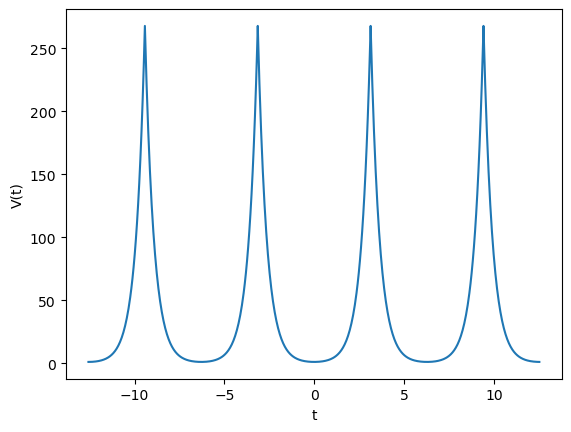

In [25]:
V = V(f, t, alpha, domain,period)  
  
# Plotting 
plt.plot(t, V)
plt.xlabel("t")
plt.ylabel("V(t)");


### FFT of the periodized function

We can perform a DFT on V using fft algorithm

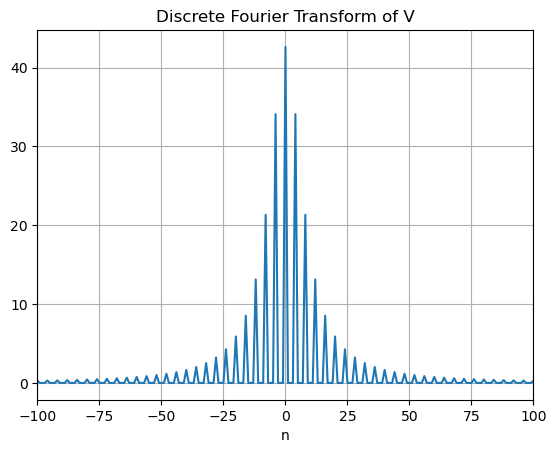

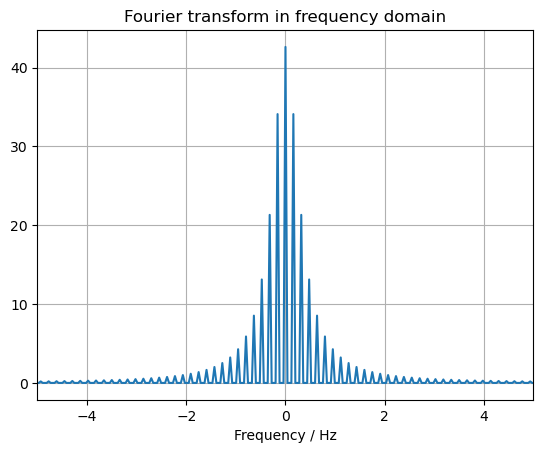

In [32]:
N = abs(interval)/(dt*np.pi)
V_fft = fft(V, norm ='forward')    #Fast Fourier transform of function V(t)
n = np.arange(-N/2,N/2,1)
Vfft_magnitudes = np.sqrt(np.real(fftshift(V_fft)*np.conjugate(fftshift(V_fft)))) # Tranforms DFT row data into magnitudes

plt.plot(n, Vfft_magnitudes); #Plot DFT shifting to center the zero frequency
plt.title("Discrete Fourier Transform of V")
plt.xlabel("n")
plt.grid(visible= True)
plt.xlim(-100,100)
plt.show()
freq = n / interval               # obtain frequencies

plt.plot(freq, Vfft_magnitudes)  # Plot DFT in the frequency domain
plt.title("Fourier transform in frequency domain")
plt.grid(visible= True)
plt.xlabel("Frequency / Hz")
plt.xlim(-5,5);             # Plot of the DFT against frequency in [-2,2]

### Comparison with Analytical Fourier Transform

To validate the accuracy of the Discrete Fourier Transform (DFT) computed using `numpy.fft`, we compare it against an **analytical expression** for the Fourier transform of the function \( f(\alpha t) \). This provides a numerical benchmark for evaluating the DFT result.

The analytical expression for the Fourier coefficients is given by:

$$
\hat{f}(n) = \frac{4 \sinh(\pi)}{\pi} \cdot \frac{(-1)^n}{n^2 + n^4}
$$

This formula captures the frequency-domain behavior of the target function and serves as ground truth. We compute the magnitudes from both the FFT and analytical expressions and plot them together:

- **FFT Result (Blue)**: Computed from the periodic extension of \( f(\alpha t) \) using `numpy.fft.fft`.
- **Analytical Result (Orange)**: Derived from the closed-form formula above.

The near-perfect overlap between the two confirms that:

- The periodicization function \( V(t) \) was correctly implemented.
- The FFT has been applied and scaled properly.
- The sampling interval and resolution are sufficient to match the aical implementation.
umerical implementation.


In [33]:
def analytical_V(n):
    return (1/np.pi)* (4 * np.sinh(2*np.pi)* (-1)**n)/(4 + n**2) 

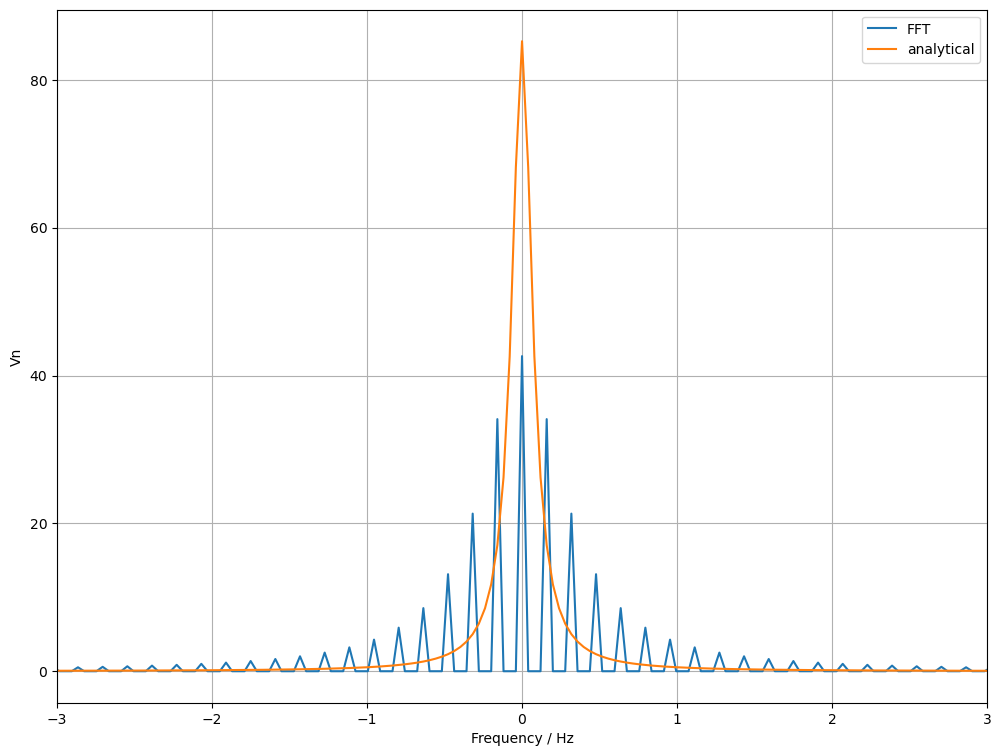

In [40]:
analytical = np.zeros_like(n)
for i in n:
    analytical[int(i)] = analytical_V(int(i))

analytical_magnitudes = np.sqrt(fftshift(analytical)**2)
fig = plt.figure(figsize = (12,9))
plt.plot(freq, Vfft_magnitudes, label = "FFT")
plt.plot(freq, analytical_magnitudes, label= "analytical")
plt.xlim(-3,3)
plt.xlabel("Frequency / Hz")
plt.grid(visible = True)
plt.ylabel("Vn")
plt.legend();